<a href="https://colab.research.google.com/github/mhdykz/processing-techniques-to-denoise-images-corrupted-by-salt-and-pepper-noise/blob/main/classic_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def add_salt_and_pepper_noise(image, noise_density):
    noisy_image = image.copy()
    total_pixels = image.size
    num_noise_pixels = int(noise_density * total_pixels)


    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255


    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image


In [11]:
image_files = ['mandrill.tif', 'livingroom.tif', 'house.tif']
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in image_files]

In [12]:
noise_densities = [0.0 , 0.3, 0.5, 0.7, 0.9]

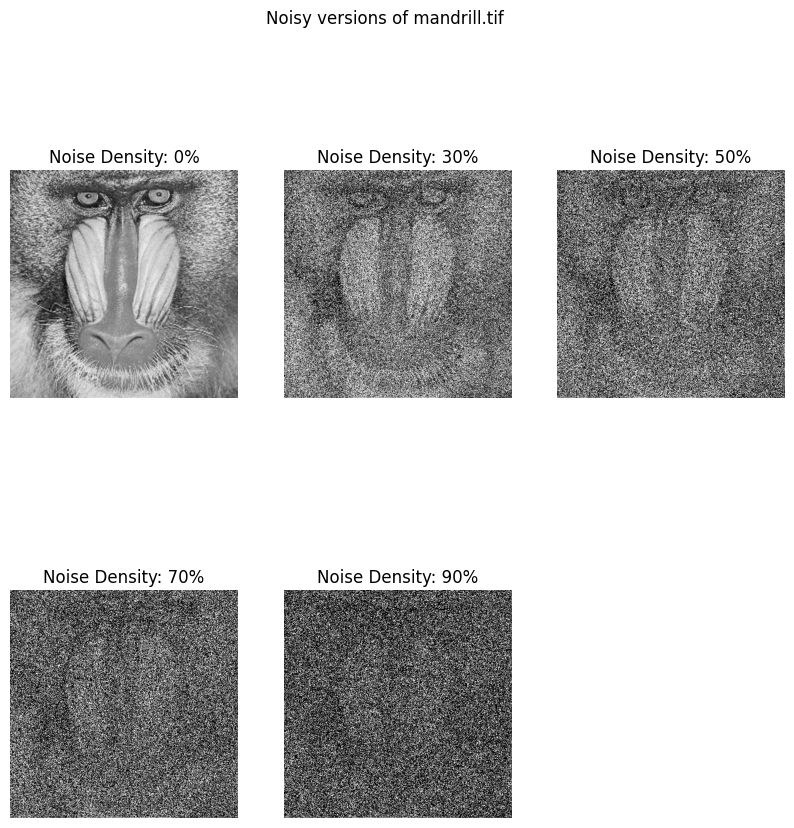

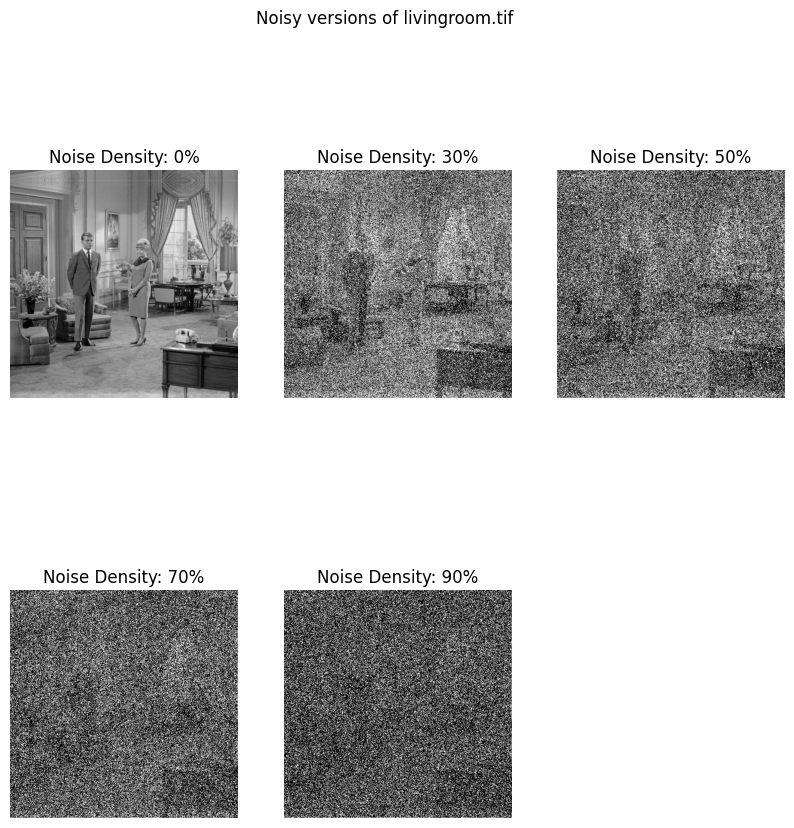

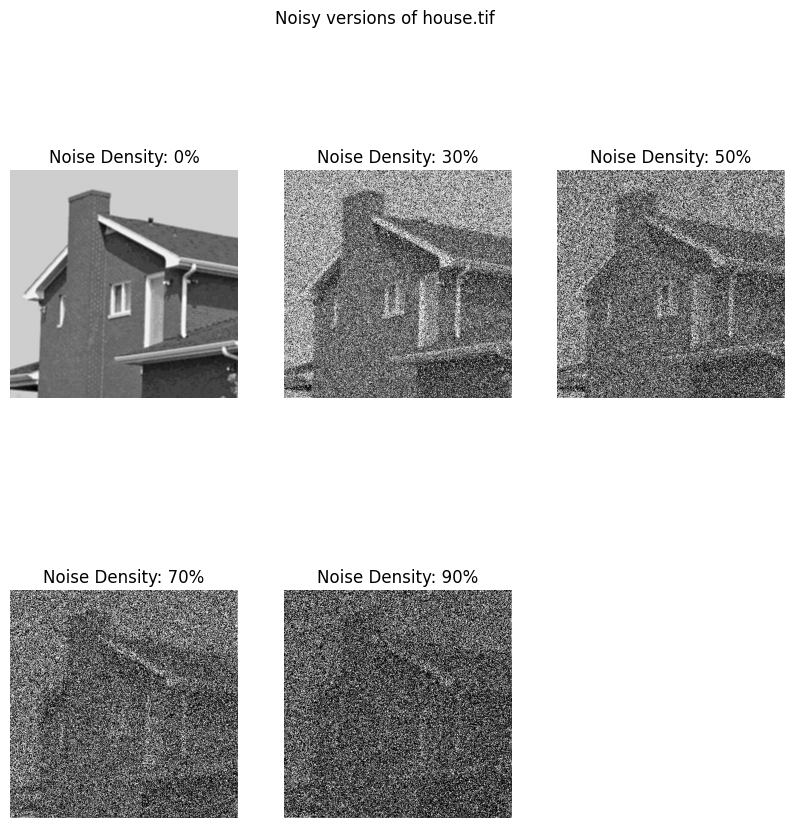

In [14]:
for img, img_file in zip(images, image_files):
    plt.figure(figsize=(10, 10))
    plt.suptitle(f'Noisy versions of {img_file}')

    for i, density in enumerate(noise_densities, 1):
        noisy_img = add_salt_and_pepper_noise(img, density)
        plt.subplot(2, 3, i)
        plt.title(f'Noise Density: {int(density * 100)}%')
        plt.imshow(noisy_img, cmap='gray')
        plt.axis('off')

    plt.show()